In [2]:
#%matplotlib widget
# jeśli wykresy nie będą działać - usuń (zakomentuj) powyższą linijkę i zrestartuj kernel notebooka

import numpy as np
import matplotlib.pyplot as plt

---

Użyj odpowiednich funkcji pakietu NumPy aby zdefiniować 
- macierz 3x3 o zadanych wartościach (dowolnych)
- macierz jednostkową o wymiarze 3x3

1. Oblicz "ręcznie" wyznaczniki wygenerowanych macierzy
2. Porównaj uzyskane wyniki z funkcją ```np.linalg.det```


In [3]:
A = np.matrix(
    [
        [ 3,8,4 ],
        [ 7,7,5 ],
        [ 3,1,2 ]
    ]
)

W1 = ((A[0,0]*A[1,1]*A[2,2] + A[0,1]*A[1,2]*A[2,0] + A[0,2]*A[1,0]*A[2,1]) - (A[0,2]*A[1,1]*A[2,0] + A[0,0]*A[1,2]*A[2,1] + A[0,1]*A[1,0]*A[2,2]))

W2 = np.linalg.det(A)

print(A)
print(W1)
print(W2)

[[3 8 4]
 [7 7 5]
 [3 1 2]]
-21
-21.0


---

Dany jest układ równań o postaci

$$
\left\{ \begin{array}{ll}
2x - y = -1\\
3x +y =16
\end{array} \right.
$$

          
Rozwiąż ten układ równań metodą wyznaczników.

In [ ]:
# W =    np.array(...) lub np.matrix(...)
# Wx = 
# Wy = 


# policzyć wyznaczniki np. za pomocą funkcji np.linalg.det
# wW = ...
# wWx
# wWy
#print (wW, wWx, wWy)

# sprawdzić przypadki szczególne

# podać rozwiązanie
# x=
# y=wWy/wW
# print(x,y)

In [4]:
W = np.matrix(
    [
        [ 3,-6, ],
        [ 5,3, ]
    ]
)

Wx = np.matrix(
    [
        [ -1,4 ],
        [ -3,1 ]
    ]
)

Wy = np.matrix(
    [
        [ 2,2 ], 
        [ -2,-11]
    ]
)
        

wW = round(np.linalg.det(W),1)
wWx = round(np.linalg.det(Wx),1)
wWy = round(np.linalg.det(Wy),1)

print(wW, wWx, wWy)

x = wWx/wW
y = wWy/wW

print(x,y)
    
    
    

39.0 11.0 -18.0
0.28205128205128205 -0.46153846153846156


Powyższy układ równań możemy zapisać "macierzowo" (zamiast x i y użyłem zapisu x_1 i x_2)

$$
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
$$
To samo możemy zapisać jako
$$
AX=C
$$

Gdybyśmy znali macierz odwrotną do A, to moglibyśmy obie strony tego równania przemnożyć lewostronnie:
$$
A^{-1}AX=A^{-1}C
$$
co dałoby nam
$$
IX=A^{-1}C
$$
czyli
$$
X=A^{-1}C
$$

Wykorzystajcie to, że w NumPy można podnieść macierz do dowolnej potęgi i spróbujcie w ten sposób rozwiązać powyższy uład równań

In [5]:
# wprowadź współczynniki macierzy A
A = np.matrix(
    [
        [ 5,1 ],
        [ 2,-4 ]
    ])

# oblicz AA jako odwrotność A
AA = A**-1

# wprowadź współczynniki macierzy C
C = np.matrix(
[
    [ -8 ],
    [ 12 ]
])

# Oblicz iloczyn odwrotności macierzy A i C
X = AA * C
print(X)

# sprawdź , czy AA*A daje macierz jednostkową
I = AA * A
print(I.round(2))

[[-0.90909091]
 [-3.45454545]]
[[1. 0.]
 [0. 1.]]


In [6]:
A = np.matrix(
    [
        [ 2,-1 ],
        [ 3,1 ]
    ])

C = np.matrix(
[
    [ 12 ],
    [ -3 ]
])

X = np.linalg.solve(A,C)
print(X)

[[ 1.8]
 [-8.4]]


Porównaj uzyskane rezultaty z wynikiem działania funkcji ```np.linalg.solve```


---

Proste wykresy funkcji możemy sobie stworzyć korzystając z następującej metody

1. definiujemy wektor przechowujący kolejne wartości na osi OX, np. 100 wartości z zakresu 4...10

x = np.linspace(4, 10, 100)

2. obliczamy wartości funkcji w tych punktach

y = 2*x+2

3. rysujemy wykres

plt.plot(x, y)


Narysuj graficzne rozwiązanie powyższego układu równań


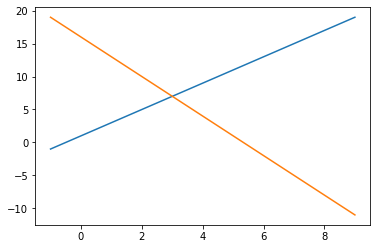

In [7]:
# przekształćmy równanie do postaci "funkcyjnej"
# 2x - y = -1
# 3x + y = 16
#
x = np.linspace(-1, 9, 100)
y1 = 2*x + 1
y2 = 16 - 3*x

# nasze rozwiązanie jest w okolicach punktu (3,7)
# x = np.linspace(....)

# wykres 1
plt.plot(x,y1)
plt.plot(x,y2)
# wykres 2
 


---
Przetestuj działanie funkcji ```np.hstack``` i ```np.vstack``` aby "skleić" ze sobą dwie wygenerowane na początku zajęć macierze

In [11]:
A = np.matrix(
    [
        [ 3,-6 ],
        [ 5,3 ]
    ])
B = np.matrix(
[
    [ -1, 4 ],
    [ -3, 1 ]
])

f = np.hstack((A,B))
print(f)

g = np.vstack((A,B))
print(g)

[[ 3 -6 -1  4]
 [ 5  3 -3  1]]
[[ 3 -6]
 [ 5  3]
 [-1  4]
 [-3  1]]


---

Jedną z metod wyznaczania macierzy odwrotnej jest metoda eliminacji Gaussa-Jordana. Polega ona na tym, że do naszej macierzy A "doklejamy" macierz jednostkową I

[ A | I ]

Teraz, stosując dozwolone operacje 
- mnożenie wiersza przez stałą <> 0
- dodawanie do wiersza innego wiersza (przemnożonego przez stałą <> 0)
- zamianę wierszy miejscami

dążymy do tego, aby uzyskać macierz postaci [ I | B ]

Jeśli nam się to uda, to B będzie macierzą odwrotną do A.


In [12]:
# przykład:

A = np.matrix(
    [
        [ 1, 3 ],
        [ 5, 7 ]
    ]
)
print (A)

I = np.eye(2)
print (I)


M = np.hstack([A, I])
print (M)

[[1 3]
 [5 7]]
[[1. 0.]
 [0. 1.]]
[[1. 3. 1. 0.]
 [5. 7. 0. 1.]]


In [13]:
I = np.eye(2)
print (I)
A = np.matrix(
    [
        [ 1, 3 ],
        [ 5, 7 ]
    ]
)

[[1. 0.]
 [0. 1.]]


In [16]:
M = np.hstack([A, I])
print (M)

[[1. 3. 1. 0.]
 [5. 7. 0. 1.]]


In [15]:
# odejmijmy od drugiego wiersza wiersz pierwszy przemnożony przez 4/5
M[1,:] -= 4/5*M[0,:]
print (M)

[[-149.  -207.     1.   -30. ]
 [ 124.2  172.6   -0.8   25. ]]


In [14]:
# od pierwszego wiersza odejmijmy wiersz drugi przemnożony przez 30
M[0,:] -= 30*M[1,:]
print (M)

[[-149. -207.    1.  -30.]
 [   5.    7.    0.    1.]]


In [88]:
# podzielmy pierwszy wiersz przez 5 i drugi przez 0.2
M[0,:] /= 5
M[1,:] /= 0.2

print (M)

[[ 1.00000000e+00  4.26325641e-15  5.00000000e+00 -6.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e+00  5.00000000e+00]]


In [17]:
# czy to co jest po lewej stronie jest wystarczająco bliskie macierzy jednostkowej ?
print (M.round(2))

[[1. 3. 1. 0.]
 [5. 7. 0. 1.]]


In [18]:
# wyciągnijmy "prawą" stronę
B = M[:, 2:]

In [19]:
# i sprawdźmy, czy jest taki jak A^{-1}
print (B)
print (A**-1)

[[1. 0.]
 [0. 1.]]
[[-0.875  0.375]
 [ 0.625 -0.125]]


Stosując powyższą metodę - wyznacz macierz odwrotną do macierzy

$$
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
5 & 6 & 0
\end{bmatrix}
$$


In [20]:
#macierz główna jednostkowa
A = np.matrix(
    [
        [ 1, 2 ,3 ],
        [ 0, 1, 4 ],
        [ 5, 6, 0 ]
    ])
I = np.eye(3)

M = np.hstack([A,I])
print(M)

[[1. 2. 3. 1. 0. 0.]
 [0. 1. 4. 0. 1. 0.]
 [5. 6. 0. 0. 0. 1.]]


In [21]:
#od wiersza trzeciego odejmuje pierwszy pomnożony przez 5
M[2,:] -= 5*M[0,:]
print(M)

[[  1.   2.   3.   1.   0.   0.]
 [  0.   1.   4.   0.   1.   0.]
 [  0.  -4. -15.  -5.   0.   1.]]


In [22]:
#do wiersza trezciego dodaje wiersz drugi pomnożony przez 4
M[2,:] += 4*M[1,:]
print(M)

[[ 1.  2.  3.  1.  0.  0.]
 [ 0.  1.  4.  0.  1.  0.]
 [ 0.  0.  1. -5.  4.  1.]]


In [23]:
#od wiersza drugiego odejmuje wirsz trzeci pomnozony przez 4
M[1,:] -= 4*M[2,:]
print(M)

[[  1.   2.   3.   1.   0.   0.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


In [24]:
#od wiersza pierwszego odejmuje wiersz drugi pomnozony przez 2 oraz wiersz trzeci pomnożony przez 3
M[0,:] -= 2*M[1,:]
print(M)


[[  1.   0.   3. -39.  30.   8.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


In [25]:
M[0,:] -= 3*M[2,:]
print(M)

[[  1.   0.   0. -24.  18.   5.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


In [27]:
B = M[:, 3:]
print(B)
print(A**-1)

[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]
[[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]
